# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_resp = requests.get(btc_url)
btc_json = btc_resp.json()
btc_price = btc_json['data']['1']['quotes']['USD']['price']
# Fetch current ETH price
# YOUR CODE HERE!]
eth_resp = requests.get(eth_url)
eth_json = eth_resp.json()
eth_price = eth_json['data']['1027']['quotes']['USD']['price']
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $39603.60
The current value of your 5.3 ETH is $10608.27


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
# YOUR CODE HERE!
SPY = 50
AGG = 200

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!

ALPACA_API_KEY = os.getenv("ALPACA_API_KEY")
ALPACA_SECRET_KEY = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    ALPACA_API_KEY,
    ALPACA_SECRET_KEY,
    api_version = "v2"
)


In [14]:
# Format current date as ISO format
# YOUR CODE HERE!
current_date = pd.Timestamp("2021-07-12", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start = current_date
).df

# Preview DataFrame
# YOUR CODE HERE!
df_tickerstimeframe = "1D"

# Get current closing prices for SPY and AGG
df_stock_data_1 = api.get_barset(
    tickers,
    timeframe,
    start=current_date,
    limit=1000
).df

next_start_date = pd.Timestamp('2021-07-12', tz='America/New_York').isoformat()
next_end_date = pd.Timestamp('2022-07-13', tz='America/New_York').isoformat()

df_stock_data_2 = api.get_barset(
    tickers,
    timeframe,
    start=next_start_date,
    end=next_end_date,
    limit=1000
).df

df_stock_data = pd.concat([df_stock_data_2, df_stock_data_1])


In [15]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = df_ticker['AGG']['close'][0]
spy_close_price = df_ticker['SPY']['close'][0]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.63
Current SPY closing price: $437.08


In [17]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = spy_close_price * SPY
my_agg_value = agg_close_price * AGG
# Print current value of share
print(f"The current value of your {SPY} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {AGG} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21854.00
The current value of your 200 AGG shares is $23126.00


### Savings Health Analysis

In [18]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Create savings DataFrame
# YOUR CODE HERE!
total_crypto = my_btc_value + my_eth_value
total_shares = my_spy_value + my_agg_value
data = [ total_crypto, total_shares]
df_savings = pd.DataFrame(data, index=['crypto','shares'], columns=['amount'])
df_savings
 
# Display savings DataFrame
display(df_savings)

,amount
crypto,50211.868
shares,44980.000


<AxesSubplot:title={'center':'Personal Savings'}, ylabel='amount'>

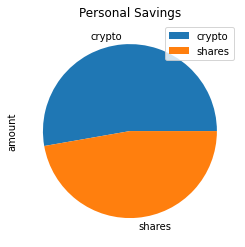

In [19]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y='amount',title='Personal Savings')

In [20]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = total_crypto + total_shares
# Validate saving health
# YOUR CODE HERE!
if (total_savings > emergency_fund):
    print("Congratulations! You have enough money in this fund")
elif (total_savings == emergency_fund):
    print("Congratualtions on reaching this financial goal!")
else:
    diff = emergency_fund - total_savings
    print(f"You are ${diff} away from reaching your financial goal")

Congratulations! You have enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [21]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [22]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
tickers = ["AGG", "SPY"]
timeframe = "1D"


df_stock_data_1 = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

next_start_date = pd.Timestamp('2016-04-17', tz='America/New_York').isoformat()
next_end_date = pd.Timestamp('2017-04-25', tz='America/New_York').isoformat()

df_stock_data_2 = api.get_barset(
    tickers,
    timeframe,
    start=next_start_date,
    end=next_end_date,
    limit=1000
).df

df_stock_data = pd.concat([df_stock_data_2, df_stock_data_1])

# Display sample data
df_stock_data.head()

AGG                                       SPY  \
                             open    high      low   close   volume    open   
time                                                                          
2016-04-18 00:00:00-04:00  110.91  110.95  110.790  110.94  1969864  207.13   
2016-04-19 00:00:00-04:00  110.94  111.00  110.770  110.92  1809082  209.74   
2016-04-20 00:00:00-04:00  111.02  111.03  110.604  110.67  2196220  209.95   
2016-04-21 00:00:00-04:00  110.52  110.62  110.450  110.51  2431934  210.12   
2016-04-22 00:00:00-04:00  110.65  110.72  110.520  110.54  2384801  208.56   

                                                             
                             high     low   close    volume  
time                                                         
2016-04-18 00:00:00-04:00  209.28  207.00  209.28  57240308  
2016-04-19 00:00:00-04:00  210.20  208.94  209.87  67063226  
2016-04-20 00:00:00-04:00  210.92  209.39  210.06  55699861  
2016-04-21 00:00:00-04:00  210.25  208.65  208.96  58074832  
2016-04-22 00:00:00-04:00  209.29  207.91  208.99  65504515

In [23]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_stocks_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [24]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_stocks_dist.portfolio_data.head()

AGG                                    \
                             open    high      low   close   volume   
time                                                                  
2016-04-18 00:00:00-04:00  110.91  110.95  110.790  110.94  1969864   
2016-04-19 00:00:00-04:00  110.94  111.00  110.770  110.92  1809082   
2016-04-20 00:00:00-04:00  111.02  111.03  110.604  110.67  2196220   
2016-04-21 00:00:00-04:00  110.52  110.62  110.450  110.51  2431934   
2016-04-22 00:00:00-04:00  110.65  110.72  110.520  110.54  2384801   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-04-18 00:00:00-04:00          NaN  207.13  209.28  207.00  209.28   
2016-04-19 00:00:00-04:00    -0.000180  209.74  210.20  208.94  209.87   
2016-04-20 00:00:00-04:00    -0.002254  209.95  210.92  209.39  210.06   
2016-04-21 00:00:00-04:00    -0.001446  210.12  210.25  208.65  208.96   
2016-04-22 00:00:00-04:00     0.000271  208.56  209.29  207.91  208.99   

                                                  
                             volume daily_return  
time                                              
2016-04-18 00:00:00-04:00  57240308          NaN  
2016-04-19 00:00:00-04:00  67063226     0.002819  
2016-04-20 00:00:00-04:00  55699861     0.000905  
2016-04-21 00:00:00-04:00  58074832    -0.005237  
2016-04-22 00:00:00-04:00  65504515     0.000144

In [25]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_stocks_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003972,0.995396,1.003510,1.006812,1.002363,0.995924,1.005392,1.005836,1.003665,0.995612,...,0.995171,1.010795,1.008718,1.005378,0.992892,1.014285,1.022152,0.993169,1.005960,0.991621
2,1.002582,1.004820,0.994122,0.989766,1.000882,1.007137,1.002479,1.016802,1.000027,0.992724,...,1.002306,1.010662,1.010422,1.004901,0.998322,1.016560,1.027199,0.980515,1.003958,0.984006
3,1.006095,1.005815,0.991819,0.990881,1.003145,1.011477,0.994669,1.011250,0.989431,0.999027,...,0.999684,1.023110,0.997169,0.994367,0.998319,1.005463,1.024754,0.966292,1.006811,0.972440
4,1.016021,1.003953,0.991305,0.996149,0.993228,1.012778,0.987111,1.023691,0.975612,0.996269,...,1.002304,1.015822,0.991195,1.003071,0.995903,1.009317,1.022085,0.964010,1.003242,0.984453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,13.132577,7.912498,1.793473,6.323379,2.773799,7.378956,3.763009,7.562302,3.962621,11.258174,...,7.599003,3.344063,9.227359,3.341487,6.135103,4.435881,5.004048,10.187370,2.327585,14.544826
7557,13.098932,7.890261,1.782794,6.315311,2.745183,7.343918,3.766921,7.515573,3.992642,11.206499,...,7.626931,3.343425,9.316930,3.348999,6.195976,4.433113,4.941276,10.250597,2.323405,14.431361
7558,13.129647,7.892848,1.797816,6.311840,2.762104,7.389357,3.814831,7.634317,3.992602,11.312109,...,7.617146,3.325088,9.378147,3.367709,6.288069,4.431672,4.934167,10.274260,2.302094,14.496947
7559,13.064220,7.984557,1.804665,6.395926,2.780553,7.451858,3.866552,7.439524,3.999889,11.267997,...,7.618866,3.290655,9.369883,3.393300,6.298716,4.447507,4.926398,10.340331,2.299005,14.518182


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

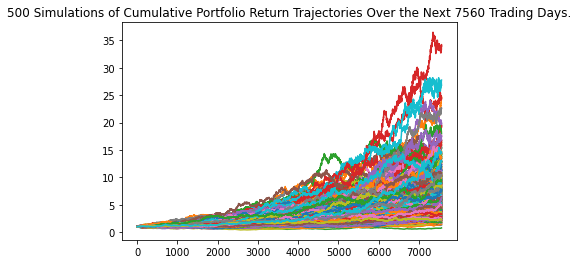

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_stocks_dist.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

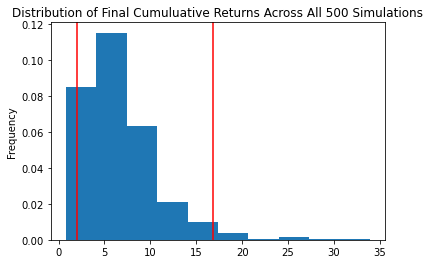

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_stocks_dist.plot_distribution()

### Retirement Analysis

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary = MC_stocks_dist.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
summary

count           500.000000
mean              6.747272
std               4.139193
min               0.784247
25%               3.852076
50%               5.869349
75%               8.362633
max              33.936366
95% CI Lower      2.007707
95% CI Upper     16.825095
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(summary[8]*initial_investment, 2)
ci_upper = round(summary[9]*initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $40154.13 and $336501.91


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [30]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(summary[8]*initial_investment, 2)
ci_upper = round(summary[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $60231.2 and $504752.86


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_stocks_5 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.2, 0.8],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [32]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_stocks_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006524,1.000803,1.011335,0.988651,1.003735,1.003965,1.012039,0.997424,0.984760,1.003249,...,1.005519,0.999882,0.997645,1.008876,1.006413,1.000657,0.998653,1.010617,0.993002,1.008359
2,1.003010,1.008776,1.016149,0.994806,1.008485,1.003753,1.009370,0.983904,0.983977,0.980428,...,1.006243,1.005469,1.012112,1.019906,0.992436,1.001879,0.992019,1.000935,0.989501,1.013978
3,1.012721,0.990657,1.019617,1.003545,0.995308,1.015795,1.025366,0.974715,0.986461,0.974639,...,1.004659,1.010254,1.016334,1.027436,0.976691,1.007848,0.989819,1.001878,0.988003,1.013877
4,1.017130,0.991075,1.017028,1.007311,0.985403,1.024987,1.030935,0.975257,0.977471,0.975311,...,0.997721,1.011880,1.015595,1.027628,0.977962,1.013416,0.990617,0.993725,1.000854,1.008076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.608446,1.975907,2.206178,1.942063,0.783059,1.883101,1.375246,1.767092,2.321377,1.107098,...,1.058229,1.525615,2.602873,2.386624,1.220359,0.976587,1.456709,1.865490,1.461419,1.192023
1257,1.593545,1.984506,2.202517,1.955532,0.786951,1.895519,1.381814,1.776683,2.313439,1.111009,...,1.072718,1.540777,2.612241,2.382754,1.218484,0.982464,1.454659,1.865892,1.486515,1.195369
1258,1.586031,1.997072,2.221818,1.954502,0.789734,1.896035,1.383111,1.770326,2.335422,1.101036,...,1.065123,1.530934,2.636656,2.368910,1.230515,0.972882,1.471333,1.880070,1.463518,1.213363
1259,1.591333,1.977335,2.253548,1.968308,0.783786,1.909859,1.369039,1.771149,2.326303,1.094086,...,1.077613,1.525930,2.647962,2.389792,1.247125,0.963030,1.483321,1.889298,1.462424,1.209329


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

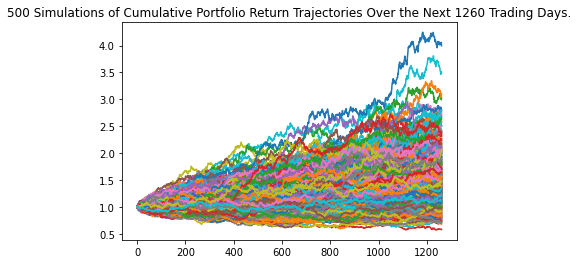

In [33]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_stocks_5.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

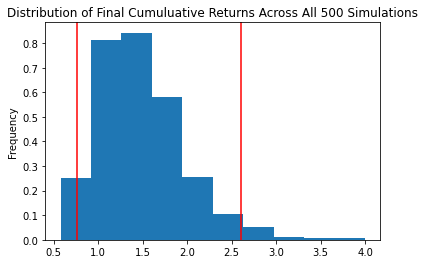

In [34]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_stocks_5.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary_5 = MC_stocks_5.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
summary_5

count           500.000000
mean              1.480398
std               0.474375
min               0.578194
25%               1.134722
50%               1.393667
75%               1.728378
max               3.996391
95% CI Lower      0.765937
95% CI Upper      2.610725
Name: 1260, dtype: float64

In [36]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 25000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(summary_5[8]*initial_investment, 2)
ci_upper_five = round(summary_5[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $25000 in the portfolio over the next 5 years will end within in the range of $19148.41 and $65268.12


### Ten Years Retirement Option

In [37]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_stocks_10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.3, 0.7],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [38]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_stocks_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999030,0.988110,1.002930,0.996731,0.996017,1.015881,0.998549,0.998770,0.999836,1.010703,...,0.989199,0.996653,1.004952,1.019627,1.008884,1.001340,0.992683,1.012905,1.004437,1.007328
2,1.004715,0.999591,1.015689,0.999852,0.995566,1.012372,1.004095,1.003636,1.004039,0.989930,...,0.996807,0.996763,1.009822,1.027699,0.990050,1.001664,0.997205,1.032126,0.991902,1.008901
3,1.006379,0.999744,1.021194,0.989703,0.995890,1.004482,1.006199,1.016304,1.012552,0.987920,...,1.006234,1.005074,1.016536,1.032665,0.993631,0.990606,0.993447,1.013742,1.001905,1.007279
4,1.014014,0.993078,1.020364,0.983240,1.002761,1.009374,1.005018,1.031640,1.019762,0.981002,...,1.010091,1.010797,1.001824,1.010126,0.995925,0.988537,0.987813,1.024893,0.997170,1.003603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.917544,1.272143,1.990097,1.205321,3.328388,1.075661,1.750231,1.512882,2.310818,2.732374,...,1.265987,2.042678,2.102022,1.908045,2.669325,2.297610,1.934086,1.208123,3.594427,1.908177
2517,2.956273,1.261797,1.986029,1.197837,3.339101,1.087528,1.735390,1.516062,2.320707,2.712748,...,1.258939,2.012916,2.096660,1.905882,2.663575,2.313697,1.935440,1.208289,3.589213,1.916473
2518,2.927149,1.275315,1.982776,1.203554,3.379413,1.087160,1.718759,1.510395,2.311490,2.707474,...,1.260915,2.007724,2.081987,1.897318,2.669113,2.296593,1.940330,1.200472,3.574148,1.926896
2519,2.887862,1.285596,1.980283,1.205009,3.371952,1.084597,1.709463,1.514444,2.280741,2.731368,...,1.250335,2.012300,2.097774,1.914753,2.692508,2.296509,1.912559,1.194675,3.553178,1.921089


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

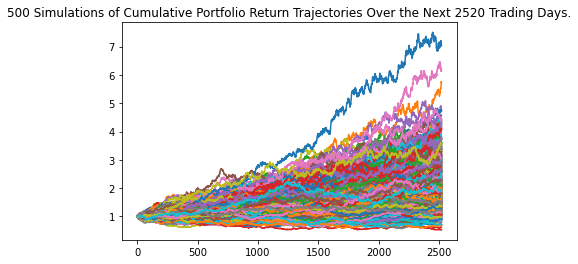

In [39]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_stocks_10.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

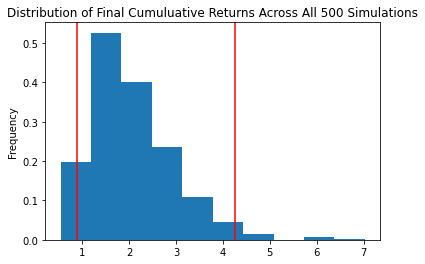

In [40]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_stocks_10.plot_distribution()

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary_10 = MC_stocks_10.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
summary_10

count           500.000000
mean              2.080944
std               0.892756
min               0.533463
25%               1.462343
50%               1.915588
75%               2.567718
max               7.027983
95% CI Lower      0.889072
95% CI Upper      4.265662
Name: 2520, dtype: float64

In [42]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 40000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(summary[8]*initial_investment, 2)
ci_upper_ten = round(summary[9]*initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 10 years will end within in the range of $80308.27 and $673003.82
